### Name - Nyan Hein
### Student Id - 2340911
### Content - CA1 Part B(Movie Review Model Using RNN)

# Exploratory Data Analysis(EDA) on the given data

In [1]:
import pandas as pd
df = pd.read_csv('Movie reviews.csv')

In [2]:
df.head(20)

,Review,Score,"Are there ways for you to generate more data? Spliting up sentences, would that help?",Language
0,Filem ini hebat! Aksi yang mendebarkan dan plo...,0.10,NaN,Malay
1,Filem ini hebat! Aksi yang mendebarkan dan plo...,0.90,NaN,Malay
2,Filem ini hebat! Aksi yang mendebarkan dan plo...,0.50,NaN,Malay
3,"Sayang sekali, pelakon tidak memberikan persem...",0.80,NaN,Malay
4,Jalan cerita yang kompleks dan penuh emosi. Su...,0.20,NaN,Malay
5,Pembuat filem berjaya memberikan pengalaman ya...,0.05,NaN,Malay
6,Adegan aksi yang terlalu banyak dan mengejutka...,0.40,NaN,Malay
7,Saya teruja sepanjang filem. Penceritaan yang ...,0.15,NaN,Malay
8,Avengers: Endgame mengecewakan dan membosankan...,0.85,NaN,Malay
9,Integrasi elemen fiksyen sains sangat menarik....,0.25,NaN,Malay


In [3]:
print(f'Shape of the data set: {df.shape}')


Shape of the data set: (527, 4)


In [4]:
print(df.dtypes)

Review                                                                                    object
Score                                                                                    float64
Are there ways for you to generate more data? Spliting up sentences, would that help?    float64
Language                                                                                  object
dtype: object


In [5]:
print(df.isnull().sum())

Review                                                                                     0
Score                                                                                      2
Are there ways for you to generate more data? Spliting up sentences, would that help?    527
Language                                                                                   0
dtype: int64


In [6]:
rows_with_null_score = df[df['Score'].isnull()]
rows_with_null_score

,Review,Score,"Are there ways for you to generate more data? Spliting up sentences, would that help?",Language
426,Ni hao,NaN,NaN,Chinese
493,Diabolic,NaN,NaN,English


**There are two null values in the score column, the null values with chinese language will be removed because 'Ni hao' is not even a review in chinese. For review, 'Diabolic' in English, this word also does not have any meaning to be a review so these two null values will be simply removed** 

**Getting the General statistics of Score**

In [7]:
print(df.describe())

            Score  \
count  525.000000   
mean     0.282626   
std      0.263022   
min      0.001000   
25%      0.100000   
50%      0.120000   
75%      0.500000   
max      0.997413   

       Are there ways for you to generate more data? Spliting up sentences, would that help?  
count                                                0.0                                      
mean                                                 NaN                                      
std                                                  NaN                                      
min                                                  NaN                                      
25%                                                  NaN                                      
50%                                                  NaN                                      
75%                                                  NaN                                      
max                                               

**Analysing the Language Distribution**

In [8]:
print(df['Language'].value_counts())

Language
English    298
Malay      226
Chinese      2
Nippon       1
Name: count, dtype: int64


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

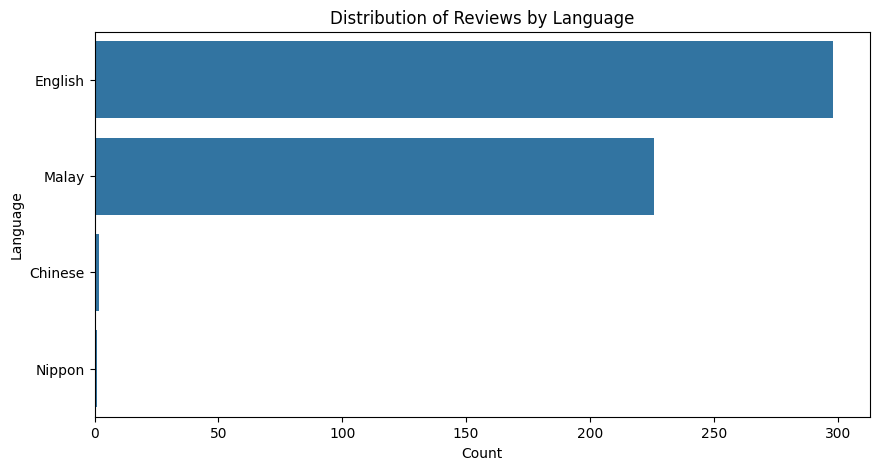

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df['Language'], order=df['Language'].value_counts().index)
plt.title('Distribution of Reviews by Language')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()

**The number of data points of English and Malay 298 are 226 respectively so both English and Malay Data should be used. Removing data from other language like Malay will lead to losing so many data so the data from Malay language will be translated into English. But it would be okay to delete or remove data from Chinese and Nippon because there are only 3 rows in total and one of the Chinese Language review does not even have a score(which is null value).**


**Visualizing the distribution of score**

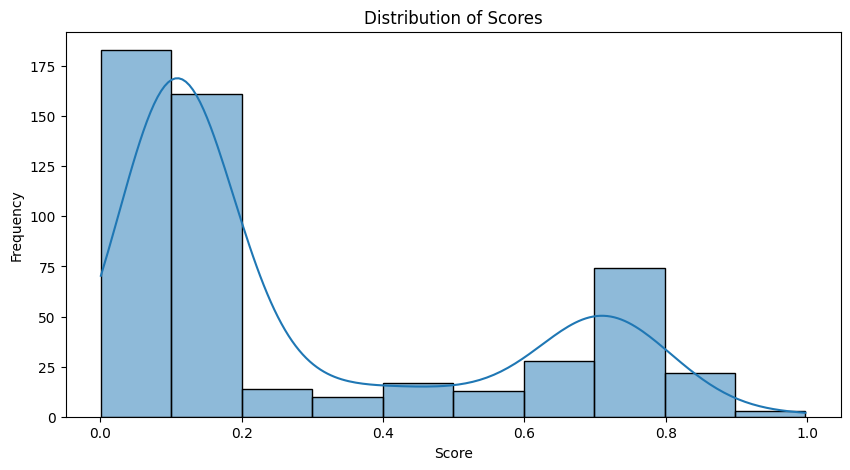

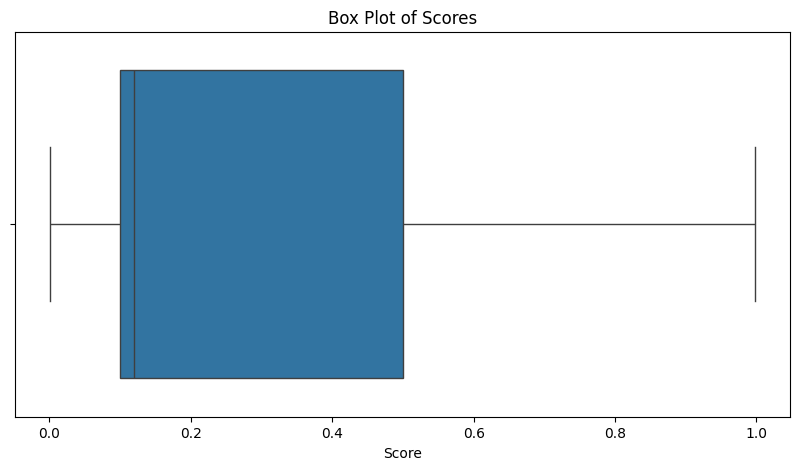

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Score'], bins=10, kde=True)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Score'])
plt.title('Box Plot of Scores')
plt.xlabel('Score')
plt.show()

**From the historgram and box plot, the distribution is positively screwed. From the analysis of the data set, the small socres indicate the good review and the big scores indicate the bad review. Until 0.2 score, the reviews are the good ones and the later scores indicate a bad review. The larger the scores, the worse the reviews become**

In [14]:
df_greater_than_0_2 = df[df['Score'] <= 0.2]
num_rows = df_greater_than_0_2.shape[0]
print(f'Number of rows less than or equal to 0.2 score: {num_rows}')

Number of rows less than or equal to 0.2 score: 344


**Later, the scores will be binned into three different categories(Excellent(0 to 0.1), Good(<=0.3)and Bad(>0.3).**

**Analysising the distribution of the length of the review**

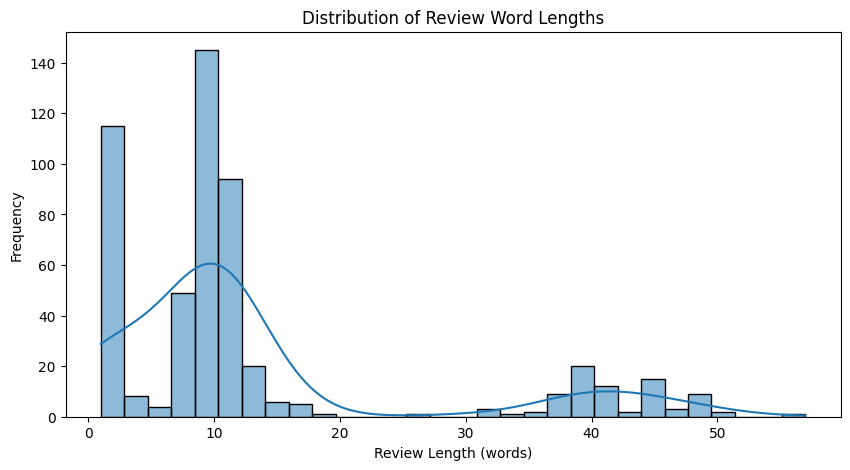

In [15]:
df['Review_Word_Length'] = df['Review'].apply(lambda x: len(str(x).split()))

# Plot histogram of review word lengths
plt.figure(figsize=(10, 5))
sns.histplot(df['Review_Word_Length'], bins=30, kde=True)
plt.title('Distribution of Review Word Lengths')
plt.xlabel('Review Length (words)')
plt.ylabel('Frequency')
plt.show()

In [16]:
df['Review_Word_Length']

0      10
1      10
2      10
3      10
4       9
       ..
522     1
523     1
524     1
525     3
526     1
Name: Review_Word_Length, Length: 527, dtype: int64

**From the length of the review in terms of words, the reviews are mostly short reviews, most of the reviews are between (5 to 15) counts. From this, I decided to have the input length of 20 which will cover most of the reviews. Reviews less than 20 words will be padded while reviews with larger than 20 words will be truncated**

**Correlation between the length of review and score**

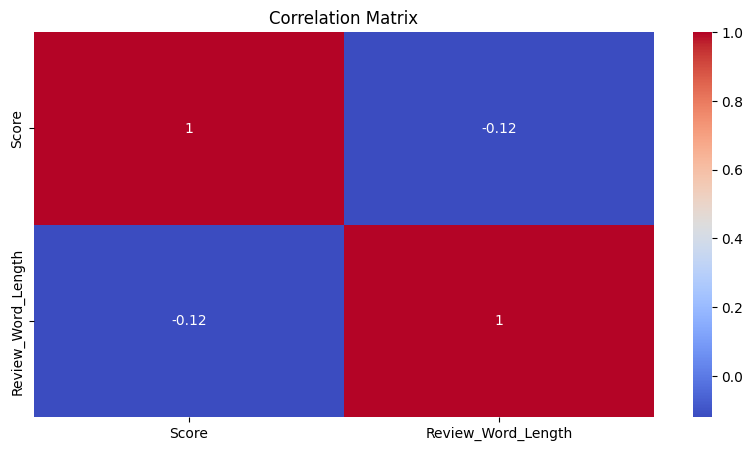

In [18]:
plt.figure(figsize=(10, 5))
sns.heatmap(df[['Score', 'Review_Word_Length']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**There is a weak negative correlation between review length and score which means the length of the review may not significantly impact on the model prediction**

**Visualizing the Word Cloud**

## 2. Data Preprocessing and Data Engineering

**Removing rows with null values in score column**

In [19]:
# Remove missing values
df.dropna(subset=['Review', 'Score'], inplace=True)

In [20]:
rows_with_null_score = df[df['Score'].isnull()]
rows_with_null_score

,Review,Score,"Are there ways for you to generate more data? Spliting up sentences, would that help?",Language,Review_Word_Length


**No null values now**

In [22]:
df.drop(df.columns[2], axis=1, inplace=True)

**Removing the punctuation and white space from the review text**

In [21]:
import re

In [23]:
def clean_text(text):
    ## Removing extra whitespace
    text = re.sub(r'\s+', ' ', text)
    ## Removing punctuation
    text = re.sub(r'[^\w\s]', '', text) 
    return text.lower().strip()

In [24]:
df['PunctuationRemoved_Review'] = df['Review'].apply(clean_text)

In [25]:
df.head(20)

,Review,Score,Language,Review_Word_Length,PunctuationRemoved_Review
0,Filem ini hebat! Aksi yang mendebarkan dan plo...,0.10,Malay,10,filem ini hebat aksi yang mendebarkan dan plot...
1,Filem ini hebat! Aksi yang mendebarkan dan plo...,0.90,Malay,10,filem ini hebat aksi yang mendebarkan dan plot...
2,Filem ini hebat! Aksi yang mendebarkan dan plo...,0.50,Malay,10,filem ini hebat aksi yang mendebarkan dan plot...
3,"Sayang sekali, pelakon tidak memberikan persem...",0.80,Malay,10,sayang sekali pelakon tidak memberikan persemb...
4,Jalan cerita yang kompleks dan penuh emosi. Su...,0.20,Malay,9,jalan cerita yang kompleks dan penuh emosi sun...
5,Pembuat filem berjaya memberikan pengalaman ya...,0.05,Malay,10,pembuat filem berjaya memberikan pengalaman ya...
6,Adegan aksi yang terlalu banyak dan mengejutka...,0.40,Malay,11,adegan aksi yang terlalu banyak dan mengejutka...
7,Saya teruja sepanjang filem. Penceritaan yang ...,0.15,Malay,7,saya teruja sepanjang filem penceritaan yang m...
8,Avengers: Endgame mengecewakan dan membosankan...,0.85,Malay,8,avengers endgame mengecewakan dan membosankan ...
9,Integrasi elemen fiksyen sains sangat menarik....,0.25,Malay,8,integrasi elemen fiksyen sains sangat menarik ...


**Unnecessary punctuations(fullstop, exclamation mark, etc, are all removed)**

**Translating reviews which are not in English to English(from Malay/Nippon/Chinese to English)**

In [26]:
from googletrans import Translator

# Initializing the translator
translator = Translator()

# Translating non-English reviews to English
def translate_text(text, src='auto', dest='en'):
        translated = translator.translate(text, src=src, dest=dest)
        return translated.text

df['Translated_Review'] = df.apply(
    lambda row: translate_text(row['PunctuationRemoved_Review']) if row['Language'] != 'English' else row['PunctuationRemoved_Review'],
    axis=1
)

In [27]:
df

,Review,Score,Language,Review_Word_Length,PunctuationRemoved_Review,Translated_Review
0,Filem ini hebat! Aksi yang mendebarkan dan plo...,0.1,Malay,10,filem ini hebat aksi yang mendebarkan dan plot...,This movie is great in thrilling action and a ...
1,Filem ini hebat! Aksi yang mendebarkan dan plo...,0.9,Malay,10,filem ini hebat aksi yang mendebarkan dan plot...,This movie is great in thrilling action and a ...
2,Filem ini hebat! Aksi yang mendebarkan dan plo...,0.5,Malay,10,filem ini hebat aksi yang mendebarkan dan plot...,This movie is great in thrilling action and a ...
3,"Sayang sekali, pelakon tidak memberikan persem...",0.8,Malay,10,sayang sekali pelakon tidak memberikan persemb...,Unfortunately the actor does not give the best...
4,Jalan cerita yang kompleks dan penuh emosi. Su...,0.2,Malay,9,jalan cerita yang kompleks dan penuh emosi sun...,Complex and emotional storyline is so entertai...
...,...,...,...,...,...,...
522,Pening,0.7,Malay,1,pening,dizzy
523,Berkesan,0.2,Malay,1,berkesan,effective
524,Mengujakan,0.1,Malay,1,mengujakan,exciting
525,Sederhana and teruk,0.6,Malay,3,sederhana and teruk,moderate and severe


**Now the review are translated into English but some of the rows have the same reviews with the different score.**

**Finding the rows with the same review**

In [28]:
duplicates = df[df.duplicated('Translated_Review',keep=False)]
duplicates_sorted = duplicates.sort_values(by='Translated_Review')

In [29]:
duplicates_sorted

,Review,Score,Language,Review_Word_Length,PunctuationRemoved_Review,Translated_Review
160,Kejutan besar dalam plot! Aksi yang memukau se...,0.10,Malay,9,kejutan besar dalam plot aksi yang memukau sep...,A huge surprise in a stunning action plot alon...
21,Kejutan besar dalam plot! Aksi yang memukau se...,0.10,Malay,9,kejutan besar dalam plot aksi yang memukau sep...,A huge surprise in a stunning action plot alon...
53,Kejutan besar di tengah-tengah filem! Aksi yan...,0.12,Malay,8,kejutan besar di tengahtengah filem aksi yang ...,A huge surprise in the middle of a thrilling a...
152,Kejutan besar di tengah-tengah filem! Aksi yan...,0.12,Malay,8,kejutan besar di tengahtengah filem aksi yang ...,A huge surprise in the middle of a thrilling a...
83,Kejutan besar di tengah-tengah filem! Aksi yan...,0.12,Malay,8,kejutan besar di tengahtengah filem aksi yang ...,A huge surprise in the middle of a thrilling a...
...,...,...,...,...,...,...
387,While Avengers: Endgame provides closure to so...,0.40,English,39,while avengers endgame provides closure to som...,while avengers endgame provides closure to som...
377,"While the film delivers on emotional beats, ce...",0.25,English,38,while the film delivers on emotional beats cer...,while the film delivers on emotional beats cer...
394,"While the film delivers on emotional beats, ce...",0.25,English,38,while the film delivers on emotional beats cer...,while the film delivers on emotional beats cer...
361,While the film provides closure to some charac...,0.30,English,40,while the film provides closure to some charac...,while the film provides closure to some charac...


**There are 220 rows with duplicated values, I will remove duplicated rows with the same score value first, because later in model training the duplicated rows may lead to overfitting of the model**

In [30]:
duplicates.to_csv('duplicates.csv',index=False)

In [31]:
df.to_csv('processed_dataset.csv', index=False)

In [39]:
##dropping the duplicated values
df_no_duplicates = df.drop_duplicates(subset=['Translated_Review', 'Score'], keep='first')

In [40]:
df_no_duplicates

,Review,Score,Language,Review_Word_Length,PunctuationRemoved_Review,Translated_Review
0,Filem ini hebat! Aksi yang mendebarkan dan plo...,0.1,Malay,10,filem ini hebat aksi yang mendebarkan dan plot...,This movie is great in thrilling action and a ...
1,Filem ini hebat! Aksi yang mendebarkan dan plo...,0.9,Malay,10,filem ini hebat aksi yang mendebarkan dan plot...,This movie is great in thrilling action and a ...
2,Filem ini hebat! Aksi yang mendebarkan dan plo...,0.5,Malay,10,filem ini hebat aksi yang mendebarkan dan plot...,This movie is great in thrilling action and a ...
3,"Sayang sekali, pelakon tidak memberikan persem...",0.8,Malay,10,sayang sekali pelakon tidak memberikan persemb...,Unfortunately the actor does not give the best...
4,Jalan cerita yang kompleks dan penuh emosi. Su...,0.2,Malay,9,jalan cerita yang kompleks dan penuh emosi sun...,Complex and emotional storyline is so entertai...
...,...,...,...,...,...,...
522,Pening,0.7,Malay,1,pening,dizzy
523,Berkesan,0.2,Malay,1,berkesan,effective
524,Mengujakan,0.1,Malay,1,mengujakan,exciting
525,Sederhana and teruk,0.6,Malay,3,sederhana and teruk,moderate and severe


**Now finding the duplicate rows with the different score but have the identical review**

In [41]:
duplicates = df_no_duplicates[df_no_duplicates.duplicated('Translated_Review',keep=False)]
duplicates_sorted = duplicates.sort_values(by='Translated_Review')

In [42]:
duplicates_sorted.shape

(29, 6)

In [43]:
duplicates_sorted

,Review,Score,Language,Review_Word_Length,PunctuationRemoved_Review,Translated_Review
19,Pelakon memberikan persembahan yang hebat. Say...,0.15,Malay,9,pelakon memberikan persembahan yang hebat saya...,Actor gives a great show I love this story
64,Pelakon-pelakon memberikan persembahan yang lu...,0.12,Malay,10,pelakonpelakon memberikan persembahan yang lua...,Actor gives a great show I love this story
25,Pelakon tidak berjaya membawa watak dengan bai...,0.70,Malay,9,pelakon tidak berjaya membawa watak dengan bai...,Actors do not succeed in carrying character we...
122,Pelakon tidak berjaya membawa watak dengan bai...,0.69,Malay,9,pelakon tidak berjaya membawa watak dengan bai...,Actors do not succeed in carrying character we...
23,Saya tidak suka bagaimana filem ini berakhir. ...,0.80,Malay,9,saya tidak suka bagaimana filem ini berakhir t...,I don't like how this movie ends unsatisfactory
120,Saya tidak suka bagaimana filem ini berakhir. ...,0.75,Malay,9,saya tidak suka bagaimana filem ini berakhir t...,I don't like how this movie ends unsatisfactory
26,"Keseluruhan, filem ini hebat! Saya akan menont...",0.08,Malay,8,keseluruhan filem ini hebat saya akan menonton...,The whole movie is great I will watch it again
125,"Keseluruhan, filem ini hebat! Saya akan menont...",0.25,Malay,8,keseluruhan filem ini hebat saya akan menonton...,The whole movie is great I will watch it again
0,Filem ini hebat! Aksi yang mendebarkan dan plo...,0.10,Malay,10,filem ini hebat aksi yang mendebarkan dan plot...,This movie is great in thrilling action and a ...
1,Filem ini hebat! Aksi yang mendebarkan dan plo...,0.90,Malay,10,filem ini hebat aksi yang mendebarkan dan plot...,This movie is great in thrilling action and a ...


**From observing the above data the duplicated reviews with different scores, the scores are not very different so I will group them using average score**

In [45]:
## removing unnessary columns
df_no_duplicates.drop(df_no_duplicates.columns[[0,2,3,4]], axis=1, inplace=True)


C:\Users\Nyan Hein\AppData\Local\Temp\ipykernel_22404\3588989444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates.drop(df_no_duplicates.columns[[0,2,3,4]], axis=1, inplace=True)


In [46]:
df_no_duplicates.head(10)

,Score,Translated_Review
0,0.10,This movie is great in thrilling action and a ...
1,0.90,This movie is great in thrilling action and a ...
2,0.50,This movie is great in thrilling action and a ...
3,0.80,Unfortunately the actor does not give the best...
4,0.20,Complex and emotional storyline is so entertai...
5,0.05,Movie makers succeed in providing an unforgett...
6,0.40,too much and surprising action scenes sometime...
7,0.15,I was excited throughout the interesting movie...
8,0.85,Avengers endgame disappointing and boring too ...
9,0.25,The integration of science fiction elements is...


In [48]:
## now aggregate the duplicated rows with the mean value
df_grouped = df_no_duplicates.groupby('Translated_Review', as_index=False).agg({
    'Score': 'mean',
    'Translated_Review': 'first'
})

In [49]:
duplicates = df_grouped[df_grouped.duplicated('Translated_Review',keep=False)]
duplicates_sorted = duplicates.sort_values(by='Translated_Review')

In [50]:
duplicates_sorted

,Score,Translated_Review


**Now, there is no duplicated rows**

In [51]:
df_grouped.shape

(397, 2)

### Removing the stop words and changing the words to its base form(Lemmatization)

**I created and used custom stop words, especially I did not remove the words which have negation effect, because later the model will classify or predict the review is good or not. Other stop words should be removed because my model is to predict the movie review is good or bad and not to predict the next words or sequence of words.   
Lemmatization is performed because this will reduce the vocabulary size which will help the model to learn effictively from fewer features and improve generalization and it will help to remove noises by removing the unncessary variation of words**

In [52]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [53]:
import nltk
## getting necessary data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to C:\Users\Nyan
[nltk_data]     Hein\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Nyan
[nltk_data]     Hein\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Nyan
[nltk_data]     Hein\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [54]:
# Tokenization and stop words removal
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [55]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [56]:
### defing custom stop words 
### creating a certain set of negation words 
negation_words = set([
    'ain', 'not',
    'aren', "aren't",
    'couldn', "couldn't",
    'didn', "didn't",
    'doesn', "doesn't",
    'don', "don't",
    'hadn', "hadn't",
    'hasn', "hasn't",
    'haven', "haven't",
    'isn', "isn't",
    'mightn', "mightn't",
    'mustn', "mustn't",
    'needn', "needn't",
    'shan', "shan't",
    'shouldn', "shouldn't",
    'wasn', "wasn't",
    'weren', "weren't",
    'won', "won't",
    'wouldn', "wouldn't"
])
### creating custom stop words 
custom_stopwords = stop_words - negation_words

In [58]:
## defining the function to remove the stop words and apply lemmatization
def preprocess_text(text):
    ## changing the text into towser case
    text = text.lower()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in custom_stopwords]
    return ' '.join(words)
### applyling the function
df_grouped['Preprocessed_Review'] = df_grouped['Translated_Review'].apply(preprocess_text)

In [59]:
df_grouped.head(10)

,Score,Translated_Review,Preprocessed_Review
0,0.100,A huge surprise in a stunning action plot alon...,huge surprise stunning action plot along movie
1,0.120,A huge surprise in the middle of a thrilling a...,huge surprise middle thrilling action movie
2,0.120,A mysterious and deep -deeper storyline is rea...,mysterious deep -deeper storyline really inter...
3,0.600,Action scenes that are too excessive too many ...,action scene excessive many typical effect
4,0.400,Action scenes that are too much and don't need...,action scene much don't need sometimes annoying
5,0.135,Actor gives a great show I love this story,actor give great show love story
6,0.120,Actor gives a very good show I like his character,actor give good show like character
7,0.150,Actor gives a very good show I love the storyt...,actor give good show love storytelling
8,0.120,Actor gives an incredible show I like this story,actor give incredible show like story
9,0.695,Actors do not succeed in carrying character we...,actor not succeed carrying character well le c...


In [60]:
df_grouped.to_csv('preprocessed_review.csv')

In [61]:
df_grouped

,Score,Translated_Review,Preprocessed_Review
0,0.10,A huge surprise in a stunning action plot alon...,huge surprise stunning action plot along movie
1,0.12,A huge surprise in the middle of a thrilling a...,huge surprise middle thrilling action movie
2,0.12,A mysterious and deep -deeper storyline is rea...,mysterious deep -deeper storyline really inter...
3,0.60,Action scenes that are too excessive too many ...,action scene excessive many typical effect
4,0.40,Action scenes that are too much and don't need...,action scene much don't need sometimes annoying
...,...,...,...
392,0.30,while the films emotional beats resonate certa...,film emotional beat resonate certain moment ma...
393,0.75,while the main actors deliver commendable perf...,main actor deliver commendable performance mom...
394,0.65,while the overarching plot of avengers endgame...,overarching plot avenger endgame ambitious occ...
395,0.22,while the plot is somewhat ordinary the film i...,plot somewhat ordinary film elevated stellar a...


### Splitting the data set into test data set and train data set before applying the data Augmentation  
**Data Augmentation will only be performed on the test data ensuring that data augmentation will not affect the original data set**

**I will create a new column as a category column which will contain three values(Excellent(less than 0.1 score) ,Good (>0.1 and <=0.3) and bad (>0.3). I decided this because by building the classification architectures,it is less complex to interpert the model and it is more realistics to predict the output as a classification. Moreover, the exact socre is also not necessary for the model to predict. For binning, I decided the mentioned range, based on the analysis of the data set and distribution of the scores.**

In [62]:
## Definin the function to categorize scores
def categorize_score(score):
    if score <= 0.1:
        return 'excellent'
    elif score <= 0.3:
        return 'good'
    else:
        return 'bad'

## Applying the function to create the new column
df_grouped['movie_rank_category'] = df_grouped['Score'].apply(categorize_score)



**Visualizing the distribution of Category values**

C:\Users\Nyan Hein\AppData\Local\Temp\ipykernel_22404\593770339.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


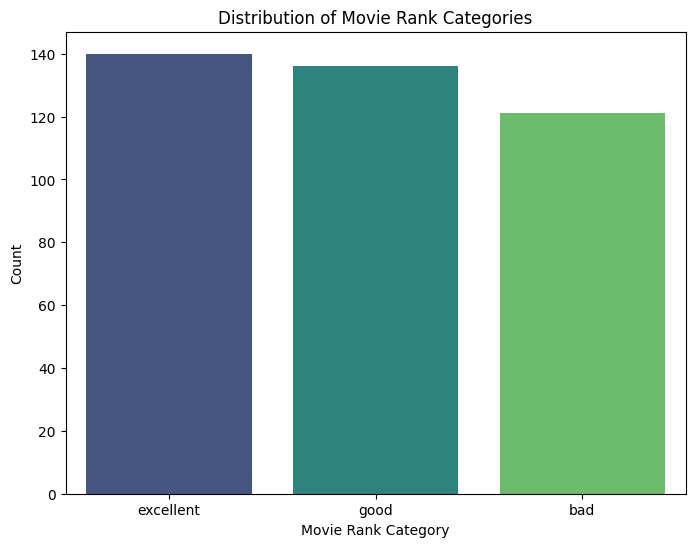

In [63]:
category_counts = df_grouped['movie_rank_category'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Distribution of Movie Rank Categories')
plt.xlabel('Movie Rank Category')
plt.ylabel('Count')
plt.show()

**The data set is quite balanced for three categories**

In [64]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df_grouped, test_size=0.2, random_state=42)

In [167]:
df_grouped

,Score,Translated_Review,Preprocessed_Review,movie_rank_category
0,0.10,A huge surprise in a stunning action plot alon...,huge surprise stunning action plot along movie,excellent
1,0.12,A huge surprise in the middle of a thrilling a...,huge surprise middle thrilling action movie,good
2,0.12,A mysterious and deep -deeper storyline is rea...,mysterious deep -deeper storyline really inter...,good
3,0.60,Action scenes that are too excessive too many ...,action scene excessive many typical effect,bad
4,0.40,Action scenes that are too much and don't need...,action scene much don't need sometimes annoying,bad
...,...,...,...,...
392,0.30,while the films emotional beats resonate certa...,film emotional beat resonate certain moment ma...,good
393,0.75,while the main actors deliver commendable perf...,main actor deliver commendable performance mom...,bad
394,0.65,while the overarching plot of avengers endgame...,overarching plot avenger endgame ambitious occ...,bad
395,0.22,while the plot is somewhat ordinary the film i...,plot somewhat ordinary film elevated stellar a...,good


In [175]:
train_data

,Preprocessed_Review,movie_rank_category
262,action sequence mindblowing plot twist keep ed...,excellent
113,avenger endgame delivers promise emotional rol...,excellent
176,fabulous,excellent
63,film amazing stunning action interesting plot,excellent
245,reintroduces,good
...,...,...
71,movie truly impressive deep feeling,good
106,amazing action,good
270,actor portrayal avenger endgame occasionally l...,bad
348,movie delivers outstanding experience truly ca...,excellent


In [66]:
test_data.shape

(80, 4)

In [179]:
train_data

,Preprocessed_Review,movie_rank_category
262,action sequence mindblowing plot twist keep ed...,excellent
113,avenger endgame delivers promise emotional rol...,excellent
176,fabulous,excellent
63,film amazing stunning action interesting plot,excellent
245,reintroduces,good
...,...,...
71,movie truly impressive deep feeling,good
106,amazing action,good
270,actor portrayal avenger endgame occasionally l...,bad
348,movie delivers outstanding experience truly ca...,excellent


## Performing Data Augmentation on the Train Data Set

**I will split the reviews, into two words, three words and four words sequences, each newly created row will have the same movie rank category.**

In [184]:
### generating sequnces 
def generate_sequences(review, n):
    words = review.split()
    if len(words) < n:
        return [review]  # Return the original review if it has fewer words than n
    return [' '.join(words[i:i+n]) for i in range(len(words)-n+1)]

In [182]:
train_data.columns

Index(['Preprocessed_Review', 'movie_rank_category'], dtype='object')

In [194]:
new_rows = []

# Iterating through each row in the DataFrame to produce new rows with new sequences of rows
for index, row in train_data.iterrows():
    preprocessed_review = row['Preprocessed_Review']
    movie_rank_category = row['movie_rank_category']
    
    # Generating sequences of 2, 3, and 4 words
    for n in [2, 3, 4]:
        sequences = generate_sequences(preprocessed_review, n)
        for seq in sequences:
            new_rows.append({
                'Preprocessed_Review': seq,
                'movie_rank_category': movie_rank_category
            })

# Converting the new rows into a DataFrame
new_df = pd.DataFrame(new_rows)
# Concatenateing the original DataFrame with the new DataFrame
extended_train_data = pd.concat([train_data, new_df], ignore_index=True)

In [195]:
extended_train_data.shape

(6841, 2)

In [196]:
extended_train_data.head(5)

,Preprocessed_Review,movie_rank_category
0,action sequence mindblowing plot twist keep ed...,excellent
1,avenger endgame delivers promise emotional rol...,excellent
2,fabulous,excellent
3,film amazing stunning action interesting plot,excellent
4,reintroduces,good


C:\Users\Nyan Hein\AppData\Local\Temp\ipykernel_22404\2948966076.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


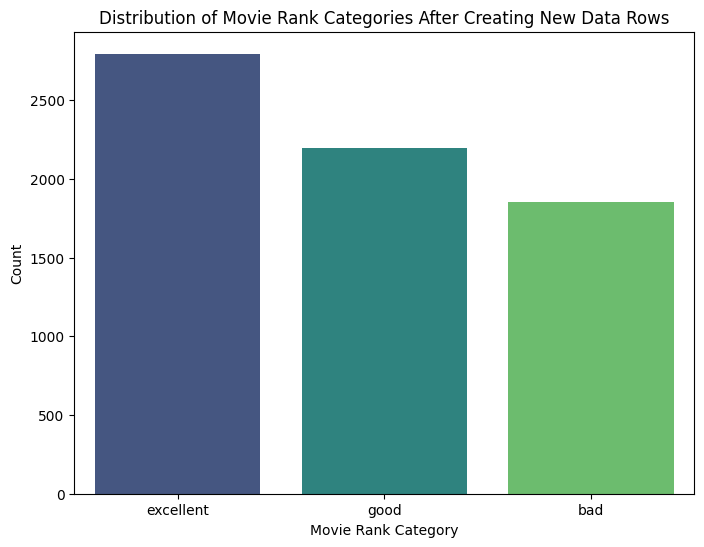

In [189]:
category_counts = extended_train_data['movie_rank_category'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Distribution of Movie Rank Categories After Creating New Data Rows')
plt.xlabel('Movie Rank Category')
plt.ylabel('Count')
plt.show()

**Preprocessing the data for model training**

In [84]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [232]:
# Defining the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(extended_train_data['Preprocessed_Review'])

# Converting texts to sequences
sequences = tokenizer.texts_to_sequences(extended_train_data['Preprocessed_Review'])

In [233]:
print(f'Total words: {len(tokenizer.word_index)+1}')

Total words: 656


In [234]:
sequences

[[4, 23, 288, 2, 13, 89, 149, 194],
 [5,
  3,
  58,
  235,
  10,
  145,
  6,
  357,
  236,
  237,
  358,
  1,
  85,
  93,
  122,
  238,
  16,
  86,
  32,
  29,
  24,
  27,
  12,
  101,
  213,
  82],
 [605],
 [1, 45, 29, 4, 40, 2],
 [303],
 [41, 311, 68, 2, 239, 76, 329, 24],
 [102,
  25,
  186,
  90,
  17,
  16,
  114,
  139,
  226,
  10,
  240,
  159,
  359,
  160,
  4,
  23,
  98,
  6,
  63,
  1,
  227,
  241,
  77,
  120,
  83],
 [5,
  3,
  4,
  23,
  140,
  360,
  289,
  290,
  361,
  161,
  362,
  1,
  103,
  87,
  242,
  11,
  7,
  162,
  243,
  15,
  35,
  32,
  29,
  20,
  27,
  12,
  101],
 [150, 13],
 [80, 18, 523, 102, 25, 186, 524, 18, 203],
 [5,
  3,
  139,
  43,
  363,
  291,
  123,
  244,
  1,
  16,
  2,
  31,
  115,
  330,
  46,
  6,
  245,
  36,
  77,
  94,
  364,
  11,
  7,
  59,
  365,
  366,
  246,
  163,
  153,
  331,
  116],
 [107,
  22,
  5,
  3,
  33,
  34,
  74,
  9,
  1,
  72,
  71,
  109,
  247,
  73,
  367,
  68,
  15,
  6,
  368,
  2,
  248,
  19,
  164,
  

**Padding the sequences**  
I will use the padding length of 20 because from observing the distribution of word length, word length 20 covers most of the review. 

In [200]:
padding_length = 20

In [238]:
padded_sequences = pad_sequences(sequences, maxlen=padding_length, padding='post', truncating='post')

**One hot encoding for my categorical values**

In [239]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [243]:
extended_train_data

,Preprocessed_Review,movie_rank_category
0,action sequence mindblowing plot twist keep ed...,excellent
1,avenger endgame delivers promise emotional rol...,excellent
2,fabulous,excellent
3,film amazing stunning action interesting plot,excellent
4,reintroduces,good
...,...,...
6836,impression absolutely mesmerizing,excellent
6837,visual spectacle leaf lasting,excellent
6838,spectacle leaf lasting impression,excellent
6839,leaf lasting impression absolutely,excellent


In [245]:
## one hot encoding the labels
onehot_encoder = OneHotEncoder(sparse=False)
labels_onehot = onehot_encoder.fit_transform(extended_train_data[['movie_rank_category']])

C:\anaconda\envs\gpu_env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [246]:
### now splitting the data into train and validation set
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, labels_onehot, test_size=0.2, random_state=42)

**Preparing the data of test data**

In [94]:
test_data['Preprocessed_Review']

114    avenger endgame expertly balance moment levity...
278    deep emotional impact resonates throughout fil...
237        overall film great watch would gladly revisit
57              movie stunning atmosphere produce amazed
72                 movie make laugh cry feeling conveyed
                             ...                        
366           underwhelming moment weak characterization
340    film outstanding appreciate wellcrafted charac...
132                                          captivating
3             action scene excessive many typical effect
18     dramatic memorable action scene many typical e...
Name: Preprocessed_Review, Length: 80, dtype: object

In [244]:
test_sequences = tokenizer.texts_to_sequences(test_data['Preprocessed_Review'])
test_padding_sequences = pad_sequences(test_sequences, maxlen=padding_length, padding='post', truncating='post')
labels_test = onehot_encoder.transform(test_data[['movie_rank_category']])
X_test = test_padding_sequences
y_test = labels_test

# Modelling and Model Evaluation 

In [204]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense,Dropout,LSTM,GRU,BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

**Building the model**

In [247]:
# Defining the model
basic_RNN_model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=padding_length),
    SimpleRNN(64, return_sequences=True),
    Dropout(0.5),
    SimpleRNN(64),
    Dropout(0.5),
    Dense(labels_onehot.shape[1], activation='softmax')
])


basic_RNN_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


basic_RNN_model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_21 (Embedding)    (None, 20, 64)            41984     
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 20, 64)            8256      
                                                                 
 dropout_96 (Dropout)        (None, 20, 64)            0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dropout_97 (Dropout)        (None, 64)                0         
                                                                 
 dense_58 (Dense)            (None, 3)                 195       
                                                                 
Total params: 58,691
Trainable params: 58,691
Non-tra

In [248]:
## training the model
basic_RNN_history = basic_RNN_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/30
171/171 [==============================] - 9s 41ms/step - loss: 0.8553 - accuracy: 0.6047 - val_loss: 0.5428 - val_accuracy: 0.7765
Epoch 2/30
171/171 [==============================] - 6s 36ms/step - loss: 0.4824 - accuracy: 0.8147 - val_loss: 0.4314 - val_accuracy: 0.8188
Epoch 3/30
171/171 [==============================] - 6s 37ms/step - loss: 0.4143 - accuracy: 0.8443 - val_loss: 0.4305 - val_accuracy: 0.8349
Epoch 4/30
171/171 [==============================] - 7s 39ms/step - loss: 0.3716 - accuracy: 0.8531 - val_loss: 0.3890 - val_accuracy: 0.8408
Epoch 5/30
171/171 [==============================] - 7s 38ms/step - loss: 0.3465 - accuracy: 0.8637 - val_loss: 0.4041 - val_accuracy: 0.8451
Epoch 6/30
171/171 [==============================] - 7s 40ms/step - loss: 0.3475 - accuracy: 0.8651 - val_loss: 0.3359 - val_accuracy: 0.8598
Epoch 7/30
171/171 [==============================] - 7s 39ms/step - loss: 0.3018 - accuracy: 0.8812 - val_loss: 0.3445 - val_accuracy: 0.8561

In [207]:
## Defing the functions to evaluate the models
def plotting_training_history(history):
    # plotting training & validation accuracy values
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    plt.show()

In [208]:
### defining the function to evaluate the model
def evaluate_model(model, X_test, y_test):
    # Predict the classes
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    
    # Classification report
    print('Classification Report')
    print(classification_report(y_true_classes, y_pred_classes, target_names=onehot_encoder.categories_[0]))

    # Confusion matrix
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=onehot_encoder.categories_[0], yticklabels=onehot_encoder.categories_[0])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

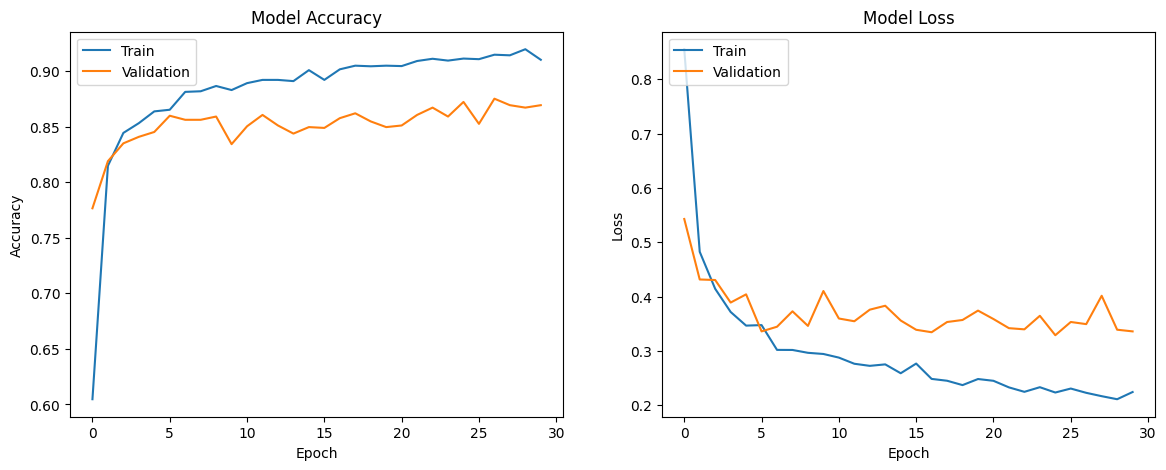

In [249]:
### getting the model training curves
plotting_training_history(basic_RNN_history)

3/3 [==============================] - 0s 9ms/step
Classification Report
              precision    recall  f1-score   support

         bad       0.62      0.75      0.68        20
   excellent       0.73      0.75      0.74        32
        good       0.78      0.64      0.71        28

    accuracy                           0.71        80
   macro avg       0.71      0.71      0.71        80
weighted avg       0.72      0.71      0.71        80



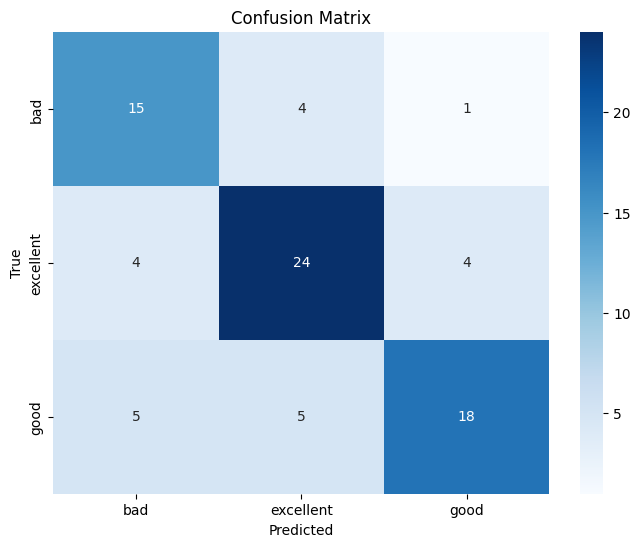

In [250]:
evaluate_model(basic_RNN_model, X_test, y_test)

**The above model is simple RNN model and its test accuracy is 0.71 and although there is a little overfitting.**

### Trying the LSTM model

In [251]:
# Defining the model with LSTM layers
LSTM_RNN_model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=padding_length),
    LSTM(128, return_sequences=True),
    Dropout(0.5),
    LSTM(64),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(labels_onehot.shape[1], activation='softmax')
])

# learning rate decreased
optimizer = Adam(learning_rate=0.001)
LSTM_RNN_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
LSTM_RNN_model.summary()



Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_22 (Embedding)    (None, 20, 128)           83968     
                                                                 
 lstm_2 (LSTM)               (None, 20, 128)           131584    
                                                                 
 dropout_98 (Dropout)        (None, 20, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_99 (Dropout)        (None, 64)                0         
                                                                 
 dense_59 (Dense)            (None, 64)                4160      
                                                                 
 dropout_100 (Dropout)       (None, 64)              

In [252]:
# Training the RNN model
LSTM_RNN_model_history = LSTM_RNN_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/30
171/171 [==============================] - 5s 14ms/step - loss: 0.9900 - accuracy: 0.4817 - val_loss: 0.6529 - val_accuracy: 0.7253
Epoch 2/30
171/171 [==============================] - 2s 11ms/step - loss: 0.5326 - accuracy: 0.8001 - val_loss: 0.4011 - val_accuracy: 0.8327
Epoch 3/30
171/171 [==============================] - 2s 11ms/step - loss: 0.3946 - accuracy: 0.8485 - val_loss: 0.3686 - val_accuracy: 0.8473
Epoch 4/30
171/171 [==============================] - 2s 12ms/step - loss: 0.3559 - accuracy: 0.8556 - val_loss: 0.3195 - val_accuracy: 0.8568
Epoch 5/30
171/171 [==============================] - 2s 12ms/step - loss: 0.3224 - accuracy: 0.8644 - val_loss: 0.3154 - val_accuracy: 0.8656
Epoch 6/30
171/171 [==============================] - 2s 12ms/step - loss: 0.3152 - accuracy: 0.8677 - val_loss: 0.3393 - val_accuracy: 0.8568
Epoch 7/30
171/171 [==============================] - 2s 12ms/step - loss: 0.3016 - accuracy: 0.8690 - val_loss: 0.3108 - val_accuracy: 0.8612

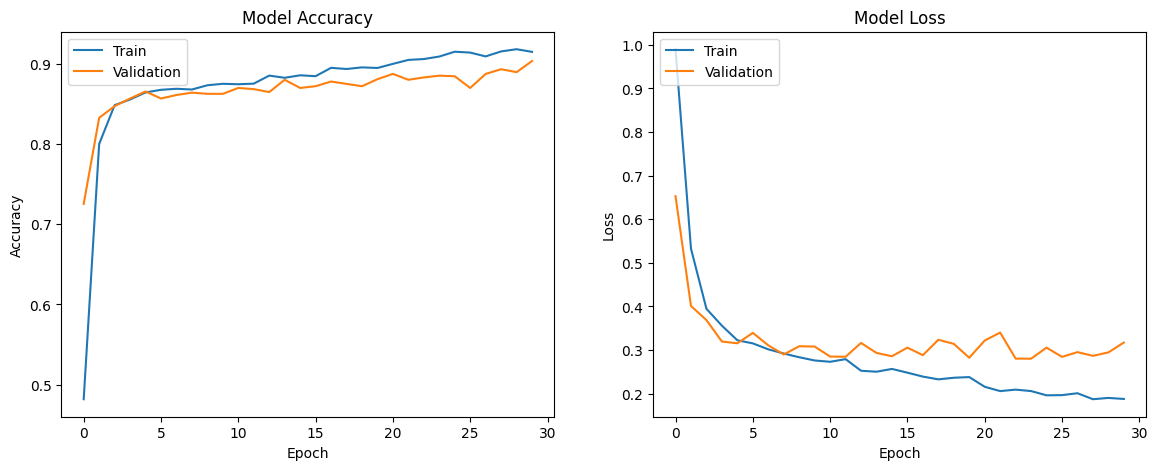

In [253]:
plotting_training_history(LSTM_RNN_model_history)

3/3 [==============================] - 1s 6ms/step
Classification Report
              precision    recall  f1-score   support

         bad       0.71      1.00      0.83        20
   excellent       0.75      0.75      0.75        32
        good       0.70      0.50      0.58        28

    accuracy                           0.73        80
   macro avg       0.72      0.75      0.72        80
weighted avg       0.72      0.72      0.71        80



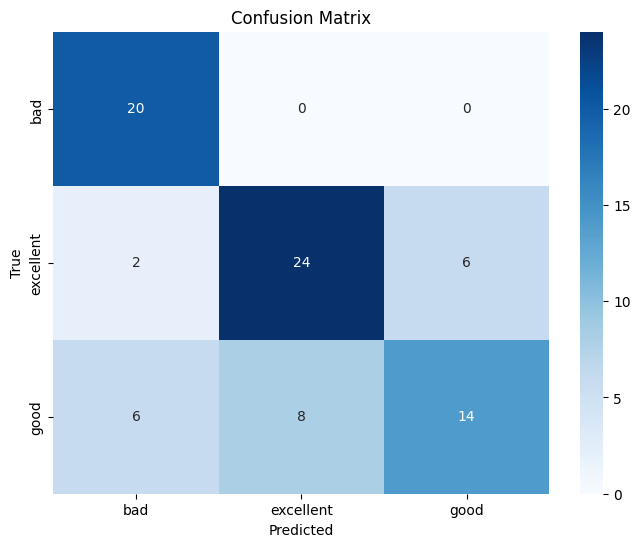

In [254]:
evaluate_model(LSTM_RNN_model, X_test, y_test)

**This model accuracy on test data has quite improved on accuracy, and the overfitting has also decreased on this model**

In [255]:
### testing the gru model
gru_model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=20),
    GRU(128, return_sequences=True),
    Dropout(0.5),
    GRU(64),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(labels_onehot.shape[1], activation='softmax')
])

optimizer = Adam(learning_rate=0.001)
gru_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
gru_model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_23 (Embedding)    (None, 20, 128)           83968     
                                                                 
 gru_55 (GRU)                (None, 20, 128)           99072     
                                                                 
 dropout_101 (Dropout)       (None, 20, 128)           0         
                                                                 
 gru_56 (GRU)                (None, 64)                37248     
                                                                 
 dropout_102 (Dropout)       (None, 64)                0         
                                                                 
 dense_61 (Dense)            (None, 64)                4160      
                                                                 
 dropout_103 (Dropout)       (None, 64)              

In [256]:
history_gru = gru_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/30
171/171 [==============================] - 5s 16ms/step - loss: 1.0904 - accuracy: 0.3891 - val_loss: 1.0853 - val_accuracy: 0.4164
Epoch 2/30
171/171 [==============================] - 2s 11ms/step - loss: 1.0882 - accuracy: 0.4044 - val_loss: 1.0849 - val_accuracy: 0.4164
Epoch 3/30
171/171 [==============================] - 2s 11ms/step - loss: 1.0867 - accuracy: 0.4015 - val_loss: 1.0837 - val_accuracy: 0.4164
Epoch 4/30
171/171 [==============================] - 2s 11ms/step - loss: 0.8158 - accuracy: 0.6018 - val_loss: 0.4985 - val_accuracy: 0.7933
Epoch 5/30
171/171 [==============================] - 2s 11ms/step - loss: 0.4805 - accuracy: 0.8160 - val_loss: 0.3652 - val_accuracy: 0.8415
Epoch 6/30
171/171 [==============================] - 2s 10ms/step - loss: 0.3484 - accuracy: 0.8628 - val_loss: 0.3178 - val_accuracy: 0.8576
Epoch 7/30
171/171 [==============================] - 2s 10ms/step - loss: 0.2944 - accuracy: 0.8743 - val_loss: 0.2895 - val_accuracy: 0.8736

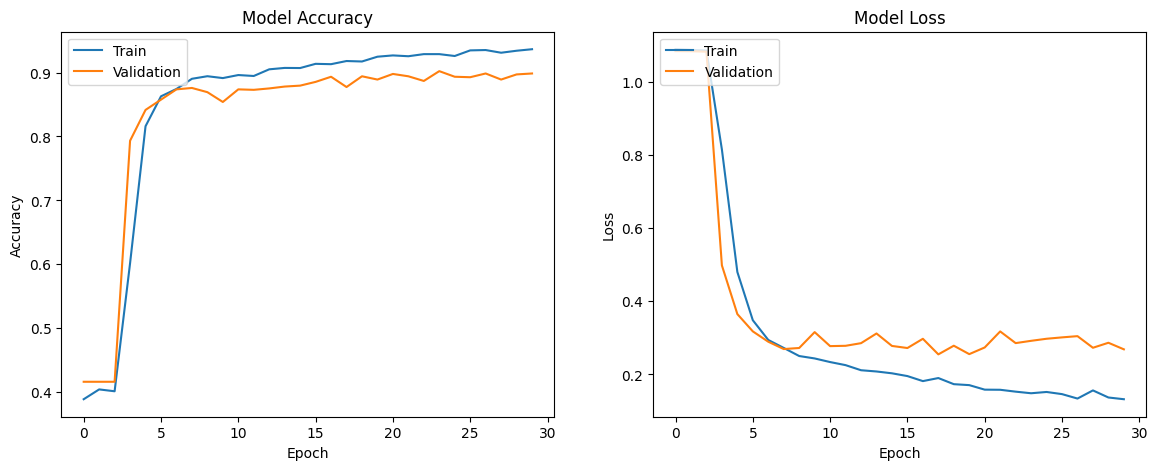

In [257]:
plotting_training_history(history_gru)

3/3 [==============================] - 1s 6ms/step
Classification Report
              precision    recall  f1-score   support

         bad       0.76      0.95      0.84        20
   excellent       0.80      0.75      0.77        32
        good       0.80      0.71      0.75        28

    accuracy                           0.79        80
   macro avg       0.79      0.80      0.79        80
weighted avg       0.79      0.79      0.78        80



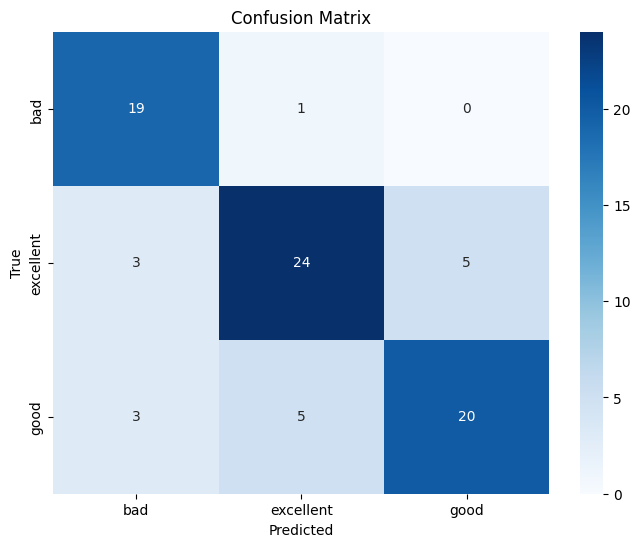

In [258]:
evaluate_model(gru_model,X_test,y_test)

**Among the simple RNN, LSTM and GRU models, GRU models seem to be the best because its accuracy on the test is the highest and from the accuracy curve of the model, the accuracy on the validation increases with the increase in accuracy on the training data**

**So, I will use GRU layers to further imporve my model**

### Model Improvement

In [262]:
# Define the improved model
improved_gru_model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=512, input_length=20), 
    GRU(256, return_sequences=True),
    BatchNormalization(),  
    Dropout(0.5),
    GRU(128, return_sequences=True),  
    BatchNormalization(),
    Dropout(0.5),
    GRU(64),  
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(labels_onehot.shape[1], activation='softmax')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
improved_gru_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
improved_gru_model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_25 (Embedding)    (None, 20, 512)           335872    
                                                                 
 gru_60 (GRU)                (None, 20, 256)           591360    
                                                                 
 batch_normalization_57 (Bat  (None, 20, 256)          1024      
 chNormalization)                                                
                                                                 
 dropout_109 (Dropout)       (None, 20, 256)           0         
                                                                 
 gru_61 (GRU)                (None, 20, 128)           148224    
                                                                 
 batch_normalization_58 (Bat  (None, 20, 128)          512       
 chNormalization)                                    

In [263]:
improved_gru_model_history = improved_gru_model.fit(X_train, y_train, epochs=30, batch_size=30, validation_data=(X_val, y_val))

Epoch 1/30
183/183 [==============================] - 10s 22ms/step - loss: 1.2923 - accuracy: 0.3520 - val_loss: 1.0923 - val_accuracy: 0.4193
Epoch 2/30
183/183 [==============================] - 3s 17ms/step - loss: 1.1421 - accuracy: 0.3562 - val_loss: 1.0925 - val_accuracy: 0.4142
Epoch 3/30
183/183 [==============================] - 3s 16ms/step - loss: 1.1131 - accuracy: 0.3648 - val_loss: 1.0914 - val_accuracy: 0.4142
Epoch 4/30
183/183 [==============================] - 3s 16ms/step - loss: 1.0988 - accuracy: 0.3832 - val_loss: 1.0924 - val_accuracy: 0.4310
Epoch 5/30
183/183 [==============================] - 3s 17ms/step - loss: 1.0891 - accuracy: 0.4013 - val_loss: 1.0436 - val_accuracy: 0.4828
Epoch 6/30
183/183 [==============================] - 3s 18ms/step - loss: 0.8725 - accuracy: 0.5638 - val_loss: 0.8132 - val_accuracy: 0.6355
Epoch 7/30
183/183 [==============================] - 3s 17ms/step - loss: 0.6679 - accuracy: 0.7039 - val_loss: 0.6483 - val_accuracy: 0.733

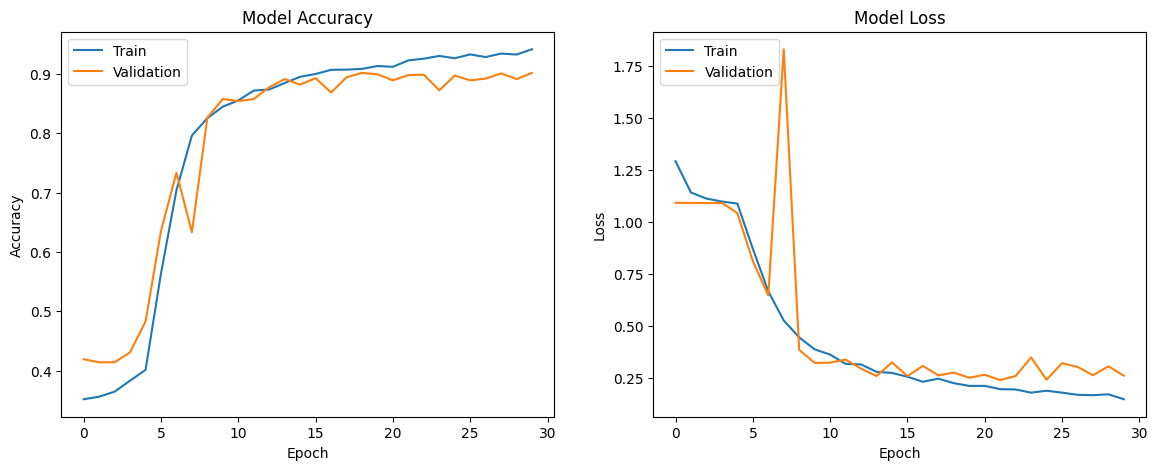

In [264]:
plotting_training_history(improved_gru_model_history)

3/3 [==============================] - 1s 11ms/step
Classification Report
              precision    recall  f1-score   support

         bad       0.81      0.85      0.83        20
   excellent       0.72      0.72      0.72        32
        good       0.63      0.61      0.62        28

    accuracy                           0.71        80
   macro avg       0.72      0.73      0.72        80
weighted avg       0.71      0.71      0.71        80



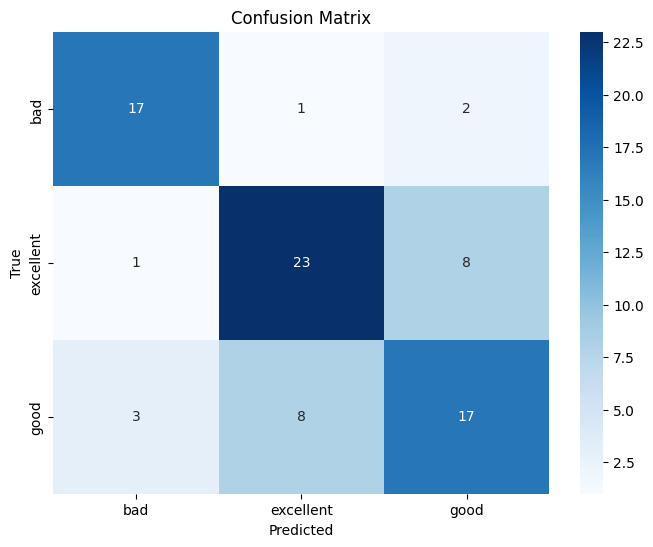

In [265]:
evaluate_model(improved_gru_model,X_test,y_test)

**This model also work well on the test data with the accuracy of 0.71 but adding more layers does not improve much**

**I will find the best hyperparameters to improve the model using manual grid search the parameters to find during the grid search will be learning rate and batch size.**

In [281]:
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
# Defining the previous model to perform the grid search
def create_model(embedding_dim=128, gru_units_1=64, gru_units_2=64, gru_units_3=64, dense_units1=32,dense_units2=32, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential([
        Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=20), 
        GRU(gru_units_1, return_sequences=True),
        BatchNormalization(),  
        Dropout(dropout_rate),
        GRU(gru_units_2, return_sequences=True),  
        BatchNormalization(),
        Dropout(dropout_rate),
        GRU(gru_units_3),  
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(dense_units1, activation='relu'),
        Dropout(dropout_rate),
        Dense(dense_units2, activation='relu'),
        Dropout(dropout_rate),
        Dense(labels_onehot.shape[1], activation='softmax')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [270]:
learning_rates = [0.001, 0.01]
batch_sizes = [16, 32]
best_accuracy = 0  # Initialize best_accuracy
best_hyperparams = {}

In [271]:
# doing Manual grid search
for learning_rate1 in learning_rates:
    for batch_size in batch_sizes:
        hyperparameter_tuning_model = create_model(learning_rate=learning_rate1)
        hyperparameter_tuning_model.fit(X_train, y_train, epochs=10, batch_size=batch_size, validation_data=(X_val, y_val), verbose=0)
        
        # Evaluating the model
        val_loss, val_accuracy = hyperparameter_tuning_model.evaluate(X_test, y_test, verbose=0)
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_hyperparams = {
                'learning_rate': learning_rate,
                'batch_size': batch_size
            }
        print(f"Tested combination: learning_rate={learning_rate}, batch_size={batch_size} - Val Accuracy: {val_accuracy}")

print("Best Hyperparameters:")
print(best_hyperparams)
print(f"Best Validation Accuracy: {best_accuracy}")

Tested combination: learning_rate=0.001, batch_size=16 - Val Accuracy: 0.75
Tested combination: learning_rate=0.001, batch_size=32 - Val Accuracy: 0.8125
Tested combination: learning_rate=0.001, batch_size=16 - Val Accuracy: 0.4000000059604645
Tested combination: learning_rate=0.001, batch_size=32 - Val Accuracy: 0.7875000238418579
Best Hyperparameters:
{'learning_rate': 0.001, 'batch_size': 32}
Best Validation Accuracy: 0.8125


### Trainin the best model using the best hyperparameters
**batch size = 32 and learning rate = 0.001**


In [282]:
best_model = create_model(learning_rate=0.001)

In [283]:
best_model_history = best_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/30
171/171 [==============================] - 7s 23ms/step - loss: 1.1688 - accuracy: 0.3554 - val_loss: 1.0867 - val_accuracy: 0.4164
Epoch 2/30
171/171 [==============================] - 3s 17ms/step - loss: 0.9397 - accuracy: 0.5183 - val_loss: 1.2856 - val_accuracy: 0.2980
Epoch 3/30
171/171 [==============================] - 3s 16ms/step - loss: 0.6465 - accuracy: 0.7175 - val_loss: 0.7775 - val_accuracy: 0.6202
Epoch 4/30
171/171 [==============================] - 3s 16ms/step - loss: 0.4932 - accuracy: 0.8145 - val_loss: 0.6837 - val_accuracy: 0.7180
Epoch 5/30
171/171 [==============================] - 3s 17ms/step - loss: 0.4000 - accuracy: 0.8401 - val_loss: 0.4603 - val_accuracy: 0.8115
Epoch 6/30
171/171 [==============================] - 3s 17ms/step - loss: 0.3724 - accuracy: 0.8467 - val_loss: 1.2764 - val_accuracy: 0.6413
Epoch 7/30
171/171 [==============================] - 3s 16ms/step - loss: 0.3471 - accuracy: 0.8529 - val_loss: 0.7611 - val_accuracy: 0.7509

**Visualizing the Best Model**

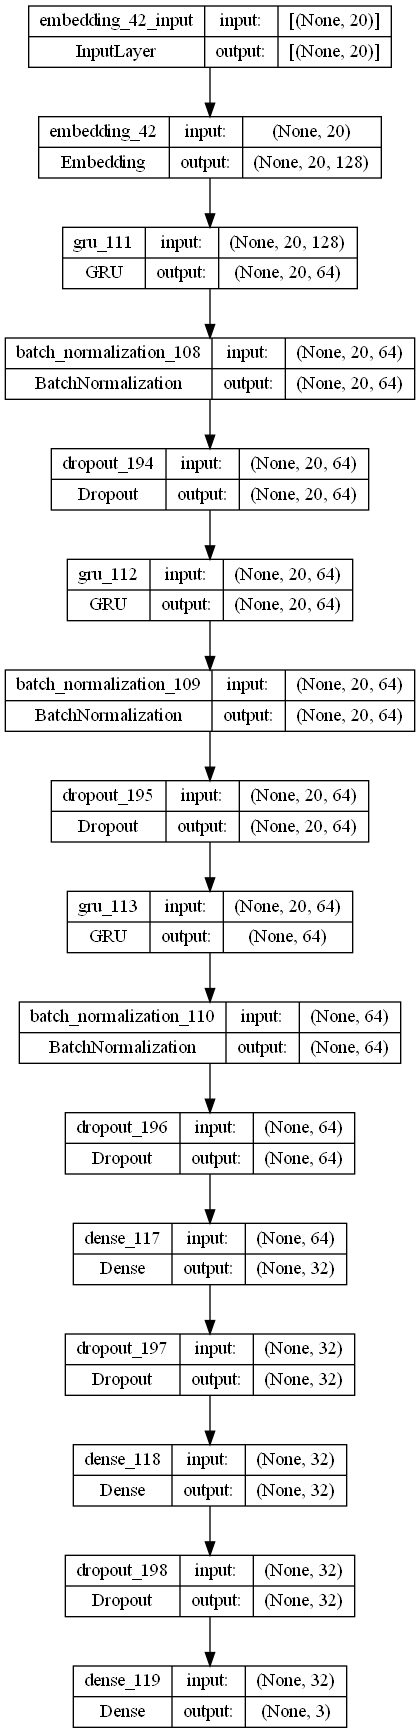

In [292]:
from keras.utils.vis_utils import plot_model
plot_model(best_model, to_file='model_visualization.png', show_shapes=True, show_layer_names=True)

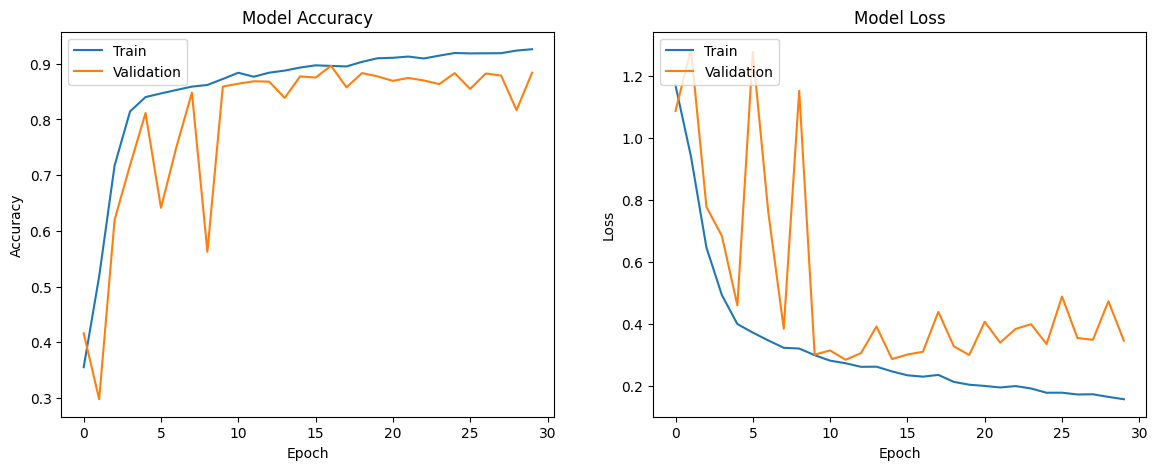

In [284]:
plotting_training_history(best_model_history)

**From the accuracy graph, the training accuracy and the validation increases dramatically, and starts stablizing around at over 20 epoch and after that some fluctuations after that. And there is still a small gap between training graph and validation graph, which means there is a small overfitting. From the loss graph, although the loss of the training graph decreases, there is many fluctuations in the validation loss graph and there is a bit large gap between the training and test,which also shows there is overfitting. One of the potentail solutions to address this is collecting and using more data or use additional data augmentaion to get more data**

3/3 [==============================] - 1s 13ms/step
Classification Report
              precision    recall  f1-score   support

         bad       0.86      0.90      0.88        20
   excellent       0.73      0.84      0.78        32
        good       0.73      0.57      0.64        28

    accuracy                           0.76        80
   macro avg       0.77      0.77      0.77        80
weighted avg       0.76      0.76      0.76        80



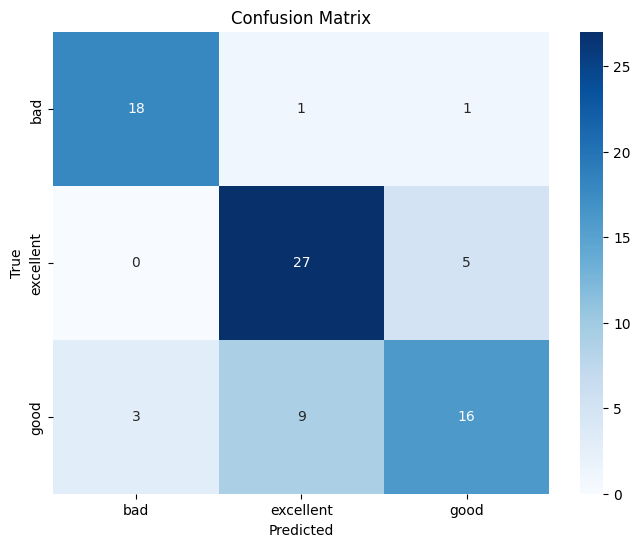

In [285]:
evaluate_model(best_model,X_test,y_test)

**This model is one of the best models, I trained with the test accuracy, 0.76.**

**Evaluation of the model**

From the classification report, the model can predict well the 'Bad' review class because it has the highest F1 score, which means it has both high precision and high recall scores. The model has the poor performance on predicting 'Good' class. 
From the confusion matrix, 'Good' reviews often seem to be misclassified as 'Excellent' prediction. This may be because some of the words contained in the excellent and good reviews are similar. 

In [287]:
best_model.save_weights('best_GRU_model.h5')